<a href="https://colab.research.google.com/github/martinbedia/mineria/blob/main/30oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 30 octubre

## Clustering

- Aprendizaje supervisado y no supervisado.
- Los clusters deben ser lo mas diferenciados y compactos posible.
- Conjuntos de forma esferica funcionan bien con k-means pero los otros no.
- Creo tantas variables dummy como categorias-1 haya.
- Es no deterministe, si lo ejecutamos dos veces pueden salir cosas  diferentes si los centros estan muy cerca.
- Validacion: cohesion y separacion

## k means

In [3]:
import sklearn
import pandas as pd
import numpy as np

In [4]:
# importar el archivo usando pandas
df = pd.read_csv('clustering_ejemplo1.csv')
df


,variable_x,variable_y,grupo
0,0.836857,2.136359,1
1,-1.413658,7.409623,3
2,1.155213,5.099619,0
3,-1.018616,7.814915,3
4,1.271351,1.892542,1
...,...,...,...
295,1.973698,1.579798,1
296,2.518342,1.391766,1
297,0.438990,4.535929,0
298,0.369479,7.791105,3


In [5]:
# utilizar to_numpy() sobre del DataFrame
# dividir el conjunto de datos en dos partes, para entrenar el modelo
x = df[['variable_x','variable_y']].to_numpy()
type(x)

numpy.ndarray

In [6]:
# se saca la variable de la informacion real de la etiqueta o grupo al que pertenece
grupos = df['grupo'].to_numpy()
grupos

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [7]:
import matplotlib.pyplot as plt

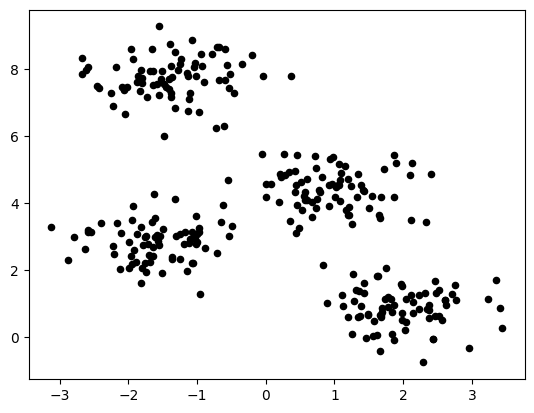

In [8]:
plt.scatter(x[:,0],x[:,1], c='black', s=20)    # c para color y s para el tamaño de los puntos
# plt.show()

Parece que hay cuatro clusters

In [9]:
# x es el conjunto de datos
# n_clusters es el valor de k, cuantos clusters queremos
# rseed valor de la semilla aleatoria

def crear_cluster(x,n_clusters,rseed):

  # 1. inicializar los clusters de forma aleatoria, hay que elegir n_clusters puntos que funcionen como centros en la primera iteracion
  rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
  i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
  centros = x[i]
  z=0  # iteraciones, vueltas que da el bucle

  # 2. realizar un bucle para la asignacion de objetos y actualizacion
  while True:
    z+=1
    # 2.1 asigno cada objeto al cluster mas cercano
    clusters = pairwise_distances_argmin(x,centros)

   # 2.2 calculo el nuevo centro del cluster
    nuevos_centros = np.array([x[clusters == i].mean(0) for i in range(n_clusters)])

   # 2.3 si no actualice los centros, salgo del bucle
    if np.all(centros == nuevos_centros):
     break
    centros = nuevos_centros

  return centros,clusters,z


In [10]:
from sklearn.metrics import pairwise_distances_argmin
# pairwise_distances_argmin(x,centros)   #  para cada una de las filas de x cual es el centro al que tienen menor distancia

In [11]:
# escribo y luego lo paso a la funcion de arriba
# inicializacion de los clusters
rseed = 5
n_clusters = 3

rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
centros = x[i]
centros

array([[-2.45809975,  7.51178724],
       [-1.86849125,  3.07982487],
       [ 2.40615694,  4.87047502]])

In [12]:
rseed = 3
n_clusters = 4
centros, clusters,z = crear_cluster(x,n_clusters,rseed)

In [13]:
crear_cluster(x,n_clusters,rseed)

(array([[-0.89247947,  8.18394342],
        [ 1.98726097,  0.90144281],
        [-0.33514647,  3.62624134],
        [-1.73102222,  7.43349916]]),
 array([1, 3, 2, 0, 1, 1, 2, 2, 0, 0, 2, 3, 2, 3, 1, 2, 2, 1, 2, 2, 1, 1,
        2, 2, 2, 2, 1, 2, 2, 2, 0, 3, 2, 3, 3, 3, 3, 3, 2, 1, 2, 2, 2, 2,
        2, 2, 0, 2, 3, 1, 2, 1, 0, 1, 1, 2, 0, 2, 3, 1, 3, 2, 0, 2, 2, 2,
        3, 1, 3, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2,
        3, 3, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 3, 2,
        2, 2, 1, 3, 1, 2, 3, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
        2, 1, 3, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2,
        1, 2, 0, 2, 1, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0,
        1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 2, 2, 1, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2,
        3, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 2,
        1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 1,

<function matplotlib.pyplot.show(close=None, block=None)>

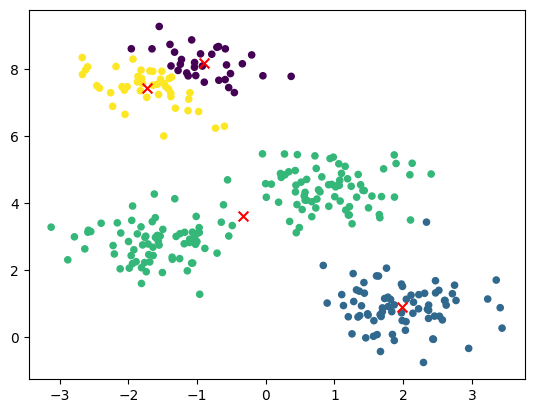

In [14]:
plt.scatter(x[:,0],x[:,1], c=clusters, s=20)
plt.scatter(centros[:,0],centros[:,1],c='red',marker='x',s=50)
plt.show

In [15]:
from sklearn.cluster import KMeans
n_clusters = 4
modelo = KMeans(n_clusters,random_state=0)
modelo

KMeans(n_clusters=4, random_state=0)

In [16]:
type(modelo)   # tipo estimador si empieza por _

sklearn.cluster._kmeans.KMeans

In [17]:
clusters = modelo.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Reiniciar el entorno y volver a ejecutar los import, cargar el df y la x y los n_clusters

In [18]:
centros = modelo.cluster_centers_

<function matplotlib.pyplot.show(close=None, block=None)>

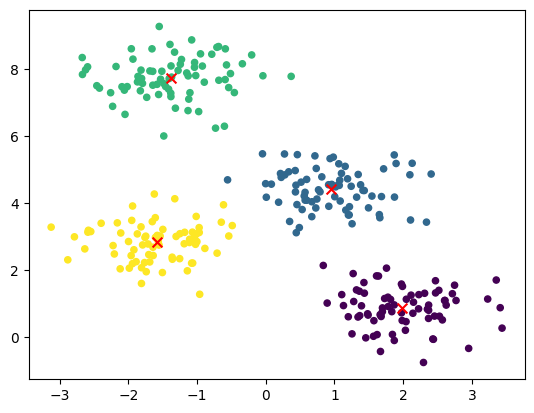

In [19]:
plt.scatter(x[:,0],x[:,1], c=clusters, s=20)
plt.scatter(centros[:,0],centros[:,1],c='red',marker='x',s=50)
plt.show

In [20]:
modelo.n_iter_

3

In [21]:
modelo.labels_

array([0, 2, 1, 2, 0, 0, 3, 1, 2, 2, 3, 2, 1, 2, 0, 1, 1, 0, 3, 3, 0, 0,
       1, 3, 3, 1, 0, 1, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 3, 0, 1, 3, 1, 1,
       3, 3, 2, 3, 2, 0, 3, 0, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 2, 3, 3, 3,
       2, 0, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1,
       2, 2, 1, 0, 2, 3, 3, 1, 0, 0, 1, 3, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       3, 3, 0, 2, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3,
       3, 0, 2, 3, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2, 2, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 1, 0, 1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 3, 2,
       0, 0, 1, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 2, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 2, 1, 3, 0, 3, 1, 2, 3, 2, 1, 2, 1, 3, 1, 1, 2, 3, 3, 0, 0, 1,
       2, 0, 0, 3, 0, 3, 1, 2, 2, 1, 1, 2, 1, 0, 3, 1, 0, 3, 2, 3, 0, 1,
       0, 2, 2, 2, 2, 3, 3, 2, 1, 3, 0, 1, 3, 3, 3, 0, 0, 2, 1, 1, 3, 0,
       2, 3, 1, 2, 1, 0, 0, 3, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 2, 3], d

# 3 Noviembre

In [22]:
def crear_cluster(x,n_clusters,rseed):

  # 1. inicializar los clusters de forma aleatoria, hay que elegir n_clusters puntos que funcionen como centros en la primera iteracion
  rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
  i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
  centros = x[i]

  nrows = 2
  ncols = 4
  fig, axs = plt.subplots(nrows, ncols, figsize = (16,8))
  row = 0
  col = 0
  num_iter = 1

  # 2. realizar un bucle para la asignacion de objetos y actualizacion
  while True:

    # 2.1 asigno cada objeto al cluster mas cercano
    clusters = pairwise_distances_argmin(x,centros)

    axs[row, col].scatter(x[:,0],x[:,1], c= clusters)
    axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red', s=100)
    axs[row, col].set_title('Iter {}'.format(num_iter))
    num_iter += 1

    col +=1
    if col == ncols:
      col = 0
      row+=1

   # 2.2 calculo el nuevo centro del cluster
    nuevos_centros = np.array([x[clusters == i].mean(0) for i in range(n_clusters)])

   # 2.3 si no actualice los centros, salgo del bucle
    if np.all(centros == nuevos_centros):
     break
    centros = nuevos_centros

  plt.show()
  return centros,clusters,z

IndexError: ignored

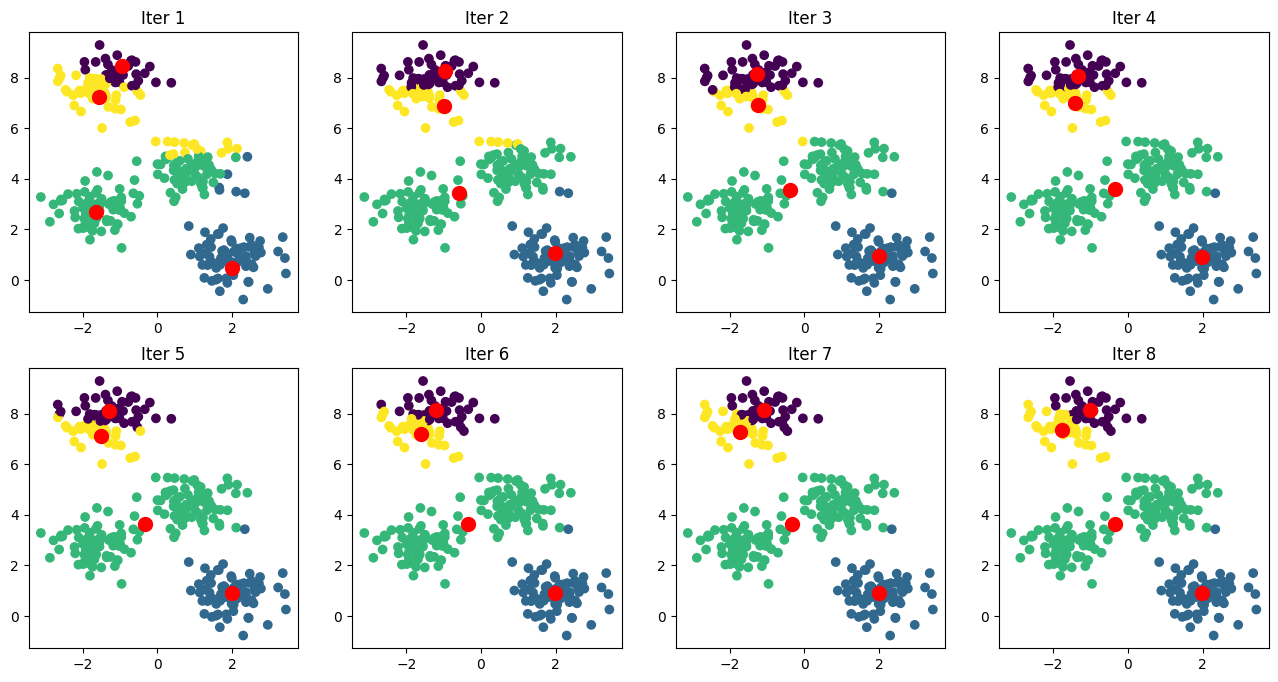

In [23]:
rseed = 3
n_clusters = 4
crear_cluster(x,n_clusters,rseed)

In [24]:
df = pd.read_csv('clustering_ejemplo3.csv')
x = df.to_numpy()

ValueError: ignored

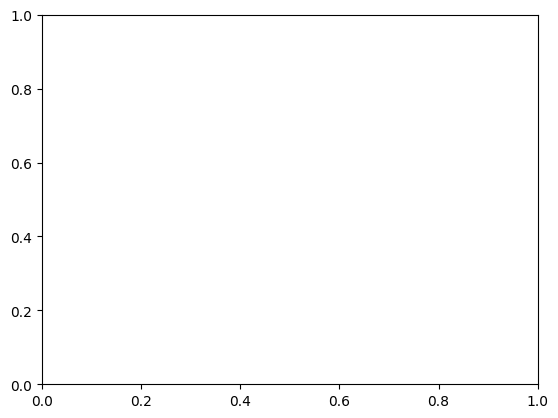

In [25]:
plt.scatter(x[:,0],x[:,1],c=clusters)
plt.scatter(centros[:,0],centros[:,1],color='red',marker='X',s=200)

In [26]:
modelo = KMeans(2,random_state=0)
clusters = modelo.fit_predict(x)
centros = modelo.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
punto1 = np.array([5,50])
punto2 = np.array([6,50])
punto3 = np.array([7,50])
punto4 = np.array([5,51])
punto5 = np.array([5,52])

distancia_1_2 = np.linalg.norm(punto1 - punto2)    # devuelve la distancia entre dos puntos
distancia_1_3 = np.linalg.norm(punto1 - punto3)
distancia_1_4 = np.linalg.norm(punto1 - punto4)
distancia_1_5 = np.linalg.norm(punto1 - punto5)

print("Distancia entre 1 y 2:", distancia_1_2)
print("Distancia entre 1 y 3:", distancia_1_3)
print("Distancia entre 1 y 4:", distancia_1_4)
print("Distancia entre 1 y 5:", distancia_1_5)



Distancia entre 1 y 2: 1.0
Distancia entre 1 y 3: 2.0
Distancia entre 1 y 4: 1.0
Distancia entre 1 y 5: 2.0


(0.0, 100.0)

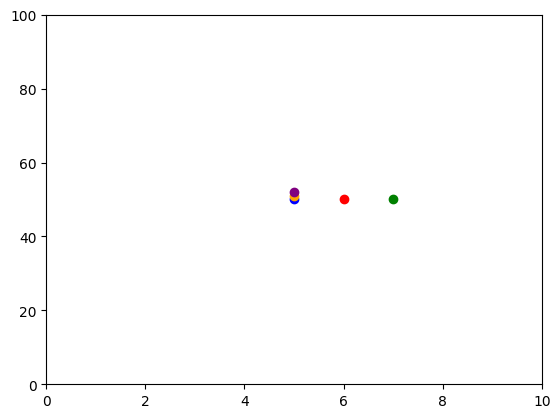

In [28]:
plt.scatter(punto1[0],punto1[1], c='blue')
plt.scatter(punto2[0],punto2[1], c='red')
plt.scatter(punto3[0],punto3[1], c='green')
plt.scatter(punto4[0],punto4[1], c='orange')
plt.scatter(punto5[0],punto5[1], c='purple')
plt.xlim(0,10)
plt.ylim(0,100)

Las distancias en realidad son las mismas aunque en el grafico no lo parezca por las magnitudes en los ejes. Los rangos de las variables son distintos. Necesitamos normalizar las varibales, para eso usaremos scaler

In [29]:
from sklearn.preprocessing import StandardScaler
modelo = KMeans(2,random_state=0)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
clusters = modelo.fit_predict(x_scaled)
centros = modelo.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


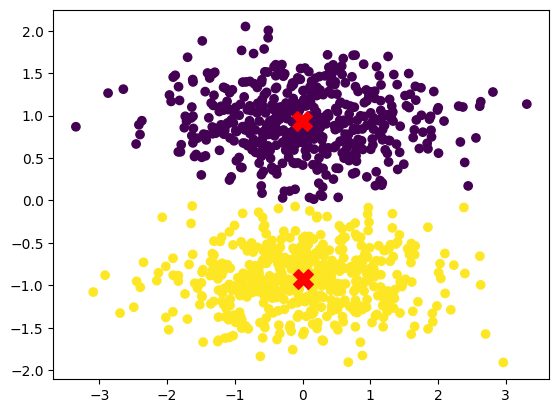

In [30]:
# codigo de arriba
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=clusters)
plt.scatter(centros[:,0],centros[:,1],color='red',marker='X',s=200)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

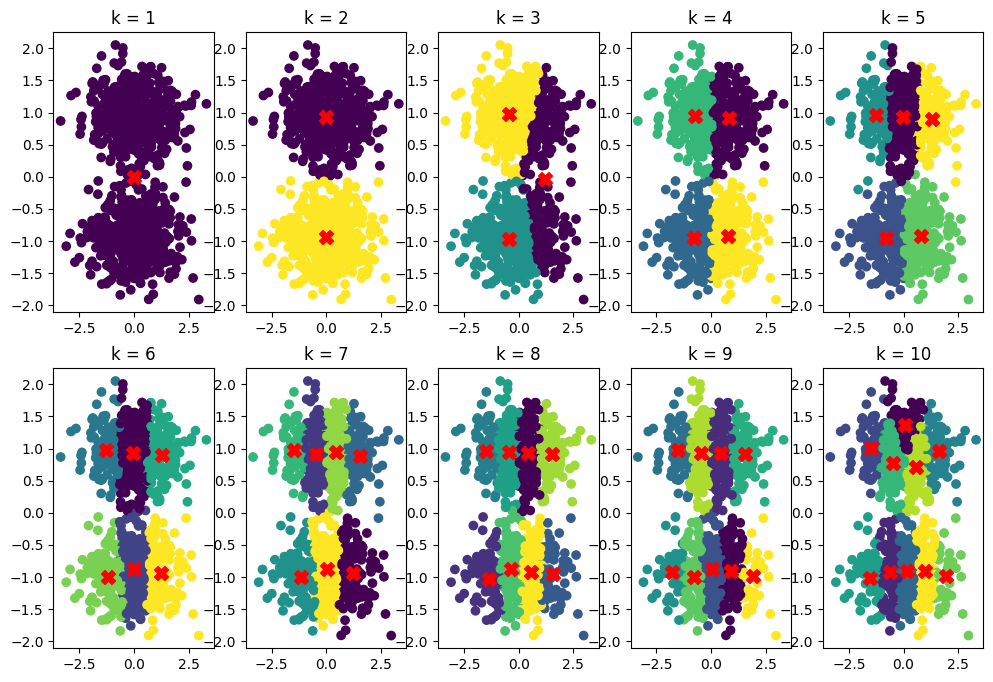

In [31]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(x_scaled)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(x_scaled[:,0],x_scaled[:,1], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

# Clustering ejs

Leer los csv de clustering 4 y clustering lunas y hacer lo anterior sobre ellos

## Ejemplo 4

In [32]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# importar el archivo usando pandas
df = pd.read_csv('clustering_ejemplo4.csv')
df

,variable_x,variable_y
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


In [34]:
# utilizar to_numpy() sobre del DataFrame
# dividir el conjunto de datos en dos partes, para entrenar el modelo
x = df[['variable_x','variable_y']].to_numpy()
type(x)

numpy.ndarray

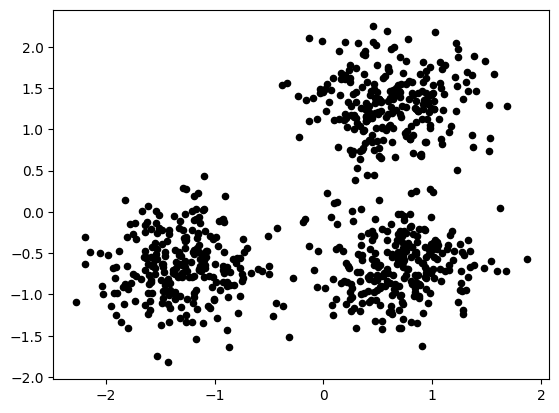

In [36]:
plt.scatter(x[:,0],x[:,1], c='black', s=20)
# plt.show()

In [35]:
def crear_cluster(x,n_clusters,rseed):

  # 1. inicializar los clusters de forma aleatoria, hay que elegir n_clusters puntos que funcionen como centros en la primera iteracion
  rng = np.random.RandomState(rseed)    # permutacion de los numeros que le ponga en el parentesis, como barajar
  i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
  centros = x[i]

  nrows = 2
  ncols = 4
  fig, axs = plt.subplots(nrows, ncols, figsize = (16,8))
  row = 0
  col = 0
  num_iter = 1

  # 2. realizar un bucle para la asignacion de objetos y actualizacion
  while True:

    # 2.1 asigno cada objeto al cluster mas cercano
    clusters = pairwise_distances_argmin(x,centros)

    axs[row, col].scatter(x[:,0],x[:,1], c= clusters)
    axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red', s=100)
    axs[row, col].set_title('Iter {}'.format(num_iter))
    num_iter += 1

    col +=1
    if col == ncols:
      col = 0
      row+=1

   # 2.2 calculo el nuevo centro del cluster
    nuevos_centros = np.array([x[clusters == i].mean(0) for i in range(n_clusters)])

   # 2.3 si no actualice los centros, salgo del bucle
    if np.all(centros == nuevos_centros):
     break
    centros = nuevos_centros

  plt.show()
  return centros,clusters,num_iter

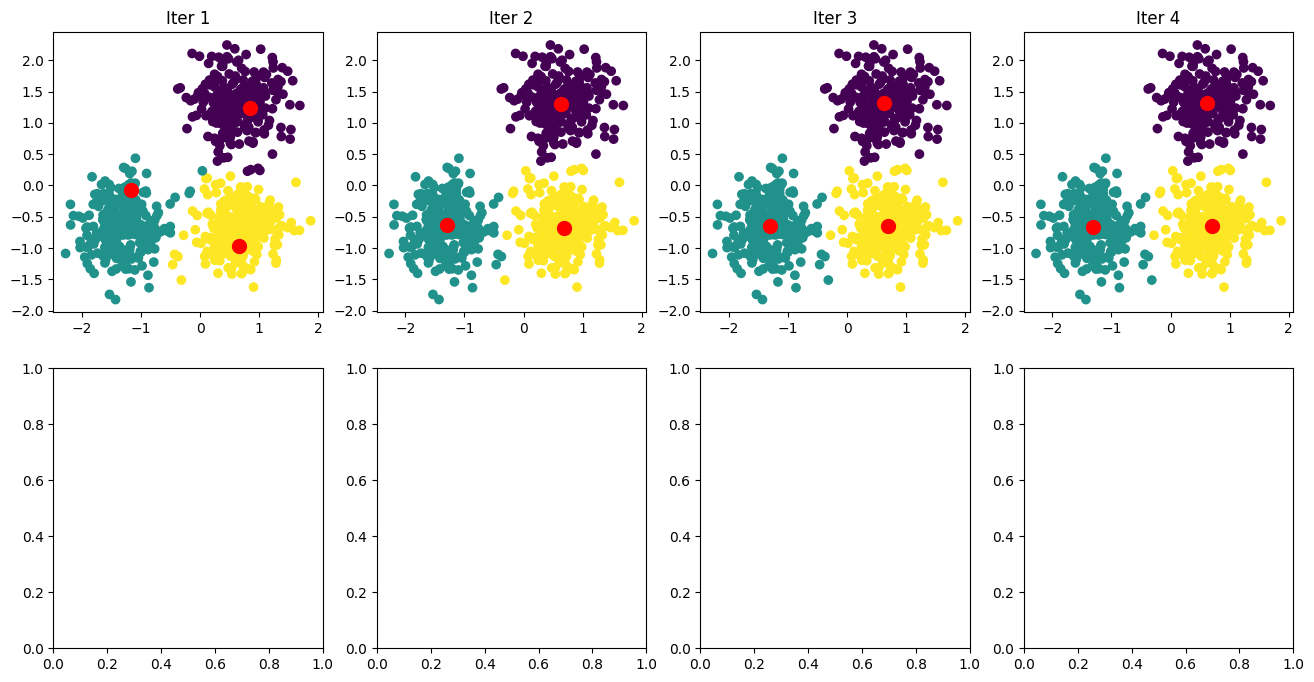

(array([[ 0.62260555,  1.3172598 ],
        [-1.30266211, -0.65704205],
        [ 0.6954587 , -0.64442334]]),
 array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2,
        2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
        1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
        2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
        1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
        2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2,
        2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
        1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
        1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
        2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
        2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1,
  

In [38]:
rseed = 3
n_clusters = 3
crear_cluster(x,n_clusters,rseed)

In [37]:
from sklearn.preprocessing import StandardScaler
modelo = KMeans(3,random_state=0)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
clusters = modelo.fit_predict(x_scaled)
centros = modelo.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


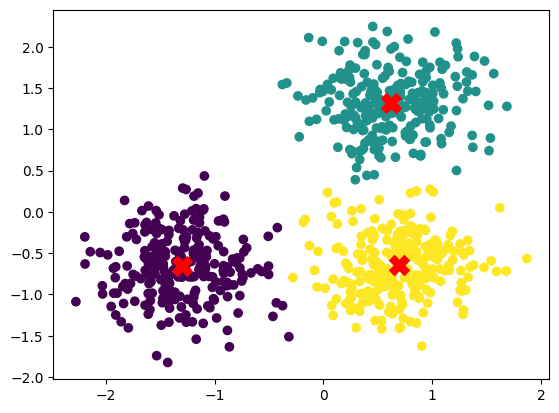

In [39]:
plt.scatter(x_scaled[:,0],x_scaled[:,1],c=clusters)
plt.scatter(centros[:,0],centros[:,1],color='red',marker='X',s=200)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

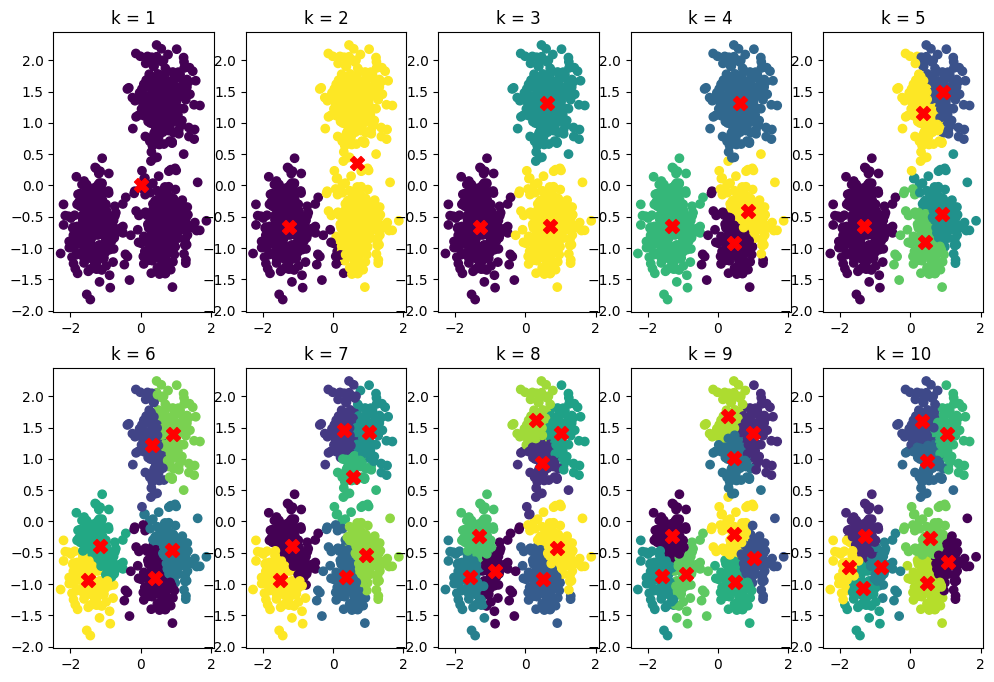

In [40]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(x_scaled)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(x_scaled[:,0],x_scaled[:,1], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

Ejemplo clustering lunas

In [41]:
df = pd.read_csv('clustering_lunas.csv')
x = df.to_numpy()
df

,variable_x,variable_y
0,0.816805,0.521645
1,1.618596,-0.379829
2,-0.021270,0.273728
3,-1.021810,-0.075440
4,1.766546,-0.170699
...,...,...
195,-0.536334,0.860268
196,1.882817,0.244356
197,0.175752,-0.007231
198,0.124236,1.007902


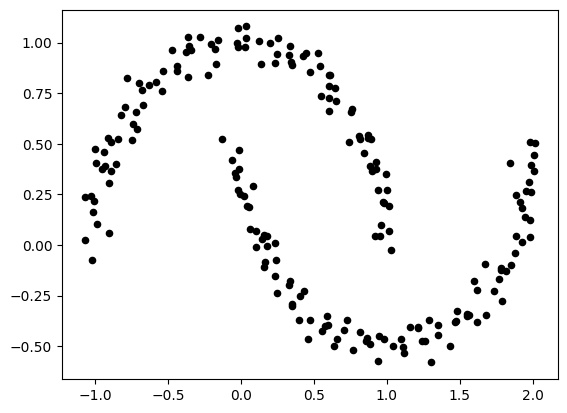

In [42]:
plt.scatter(x[:,0],x[:,1], c='black', s=20)

In [43]:
rseed = 3
n_clusters = 2

rng = np.random.RandomState(rseed)
i = rng.permutation(x.shape[0])[:n_clusters]   # las filas de x de donde saco los centros
centros = x[i]
centros

array([[ 0.55507653, -0.42493298],
       [ 0.32791175, -0.19619019]])

ValueError: ignored

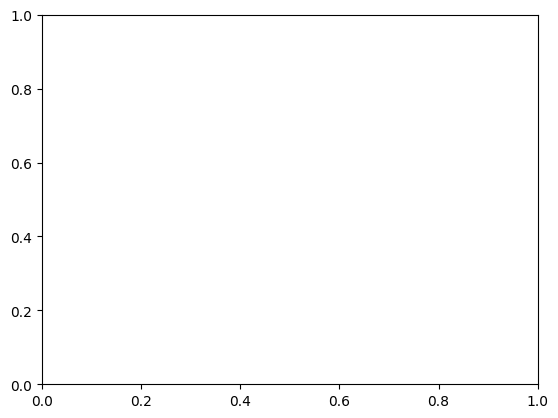

In [44]:
plt.scatter(x[:,0],x[:,1], c=clusters, s=20)
plt.scatter(centros[:,0],centros[:,1],c='red',marker='x',s=50)
plt.show

In [45]:
n_clusters = 2
modelo = KMeans(n_clusters,random_state=0)
modelo

KMeans(n_clusters=2, random_state=0)

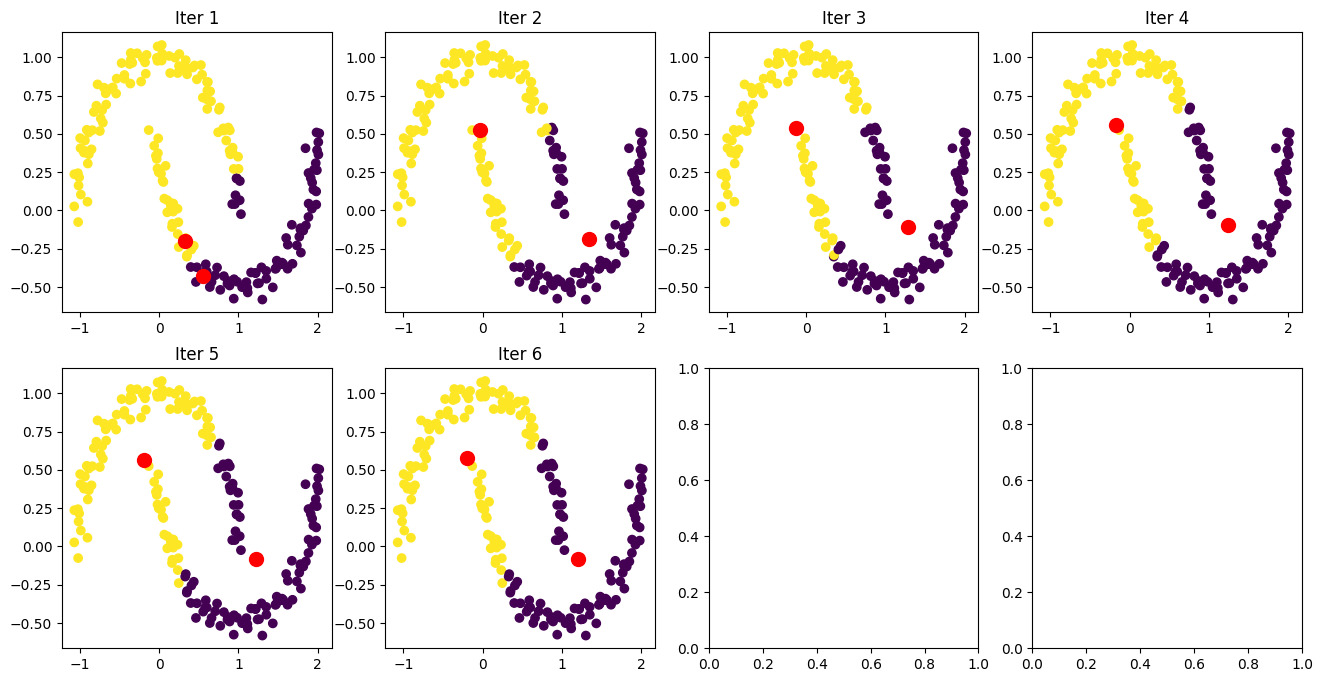

(array([[ 1.20736718, -0.0825517 ],
        [-0.2003285 ,  0.58035606]]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        1, 0]),
 7)

In [46]:
rseed = 3
n_clusters = 2
crear_cluster(x,n_clusters,rseed)

ValueError: ignored

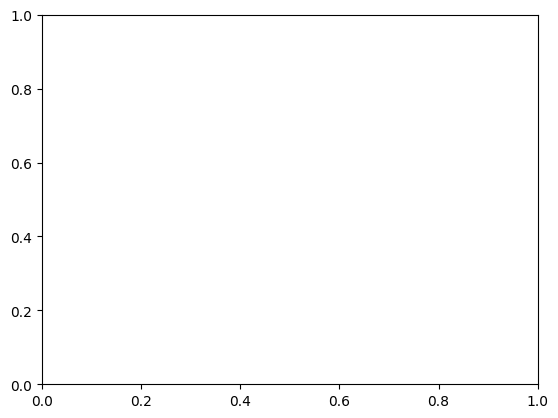

In [47]:
plt.scatter(x[:,0],x[:,1],c=clusters)
plt.scatter(centros[:,0],centros[:,1],color='red',marker='X',s=200)

In [48]:
modelo = KMeans(2,random_state=0)
clusters = modelo.fit_predict(x)
centros = modelo.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
from sklearn.preprocessing import StandardScaler
modelo = KMeans(2,random_state=0)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
clusters = modelo.fit_predict(x_scaled)
centros = modelo.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

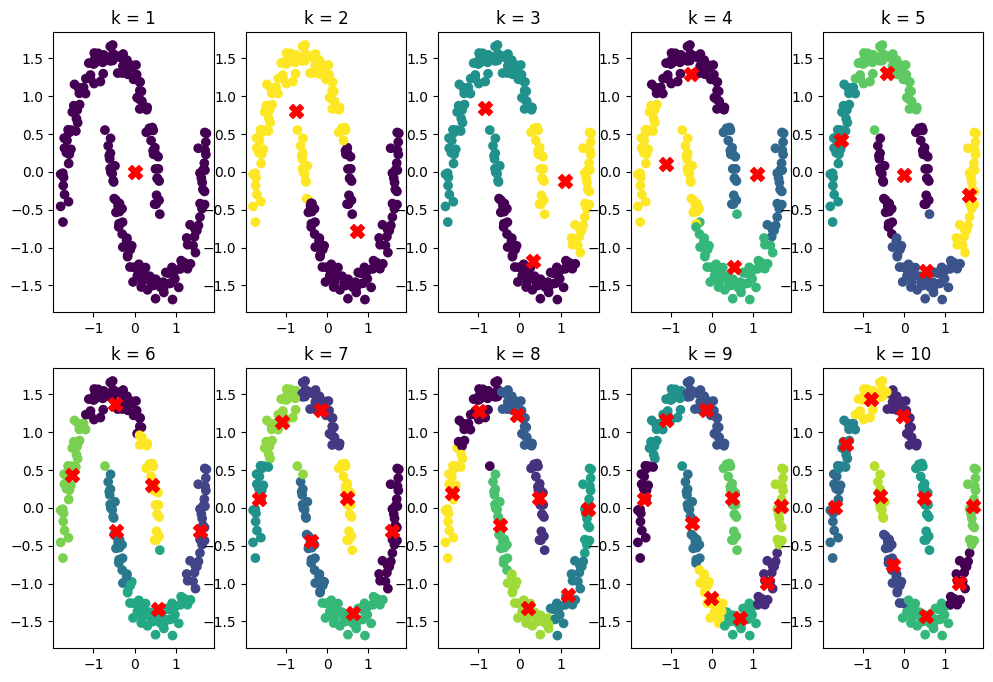

In [50]:
# entrenamiento del modelo cambiando el numero de clusters
fig, axs = plt.subplots(2,5, figsize= (12,8))   # tamaño de la cuadricula
row = 0
col = 0

for n_clusters in range (1,11):
  modelo = KMeans(n_clusters,random_state=0)   # cambio el numero de clusters en el primer valor
  clusters = modelo.fit_predict(x_scaled)
  centros = modelo.cluster_centers_

  axs[row, col].scatter(x_scaled[:,0],x_scaled[:,1], c= clusters)
  axs[row, col].scatter(centros[:,0],centros[:,1], c= 'red',marker='X', s=100)
  axs[row, col].set_title('k = {}'.format(n_clusters))

  col +=1
  if col == 5:
    col = 0
    row+=1

plt.show()

# 6 Noviembre

El de las lunas parece que no lo coge bien. Porque usamos KMeans y tendria que ser mejor otra distancia

Importar funciones de subpaquetes

Sigue en una aparte